In [5]:
import pandas as pd


continuous_after = pd.read_csv("../../Generative-AI-and-LLM-in-Healthcare-Operations/dataset/demographics_to_placement_simulation_WR_no_cap_continuous_2.csv")

# one hot encoding  -> the target is "placement", so we don't need to encode this column, also bcz RandomForest can handle categorical target data
# work release = 0 | home detention = 1 | jail = 2
for ind, item in continuous_after.iterrows():
    if item['placement'] == 'work release':
        continuous_after['placement'].iat[ind] = '0'
    elif item['placement'] == 'home detention':
        continuous_after['placement'].iat[ind] = '1'
    elif item['placement'] == 'jail':
        continuous_after['placement'].iat[ind] = '2'


#Cost multiplication
continuous_after['weighted_jl_total'] = continuous_after['c_occu_jail']*continuous_after['ocp_jl_total']
continuous_after['weighted_wr_total'] = continuous_after['c_occu_wr']*continuous_after['ocp_wr_total']
continuous_after['weighted_hd_total'] = continuous_after['c_occu_hd']*continuous_after['ocp_hd_total']
continuous_after.drop(['c_occu_jail', 'c_occu_wr', 'c_occu_hd', 'ocp_jl_total', 'ocp_wr_total', 'ocp_hd_total'], axis = 1, inplace=True)

# one hot encoding  -> the target is "placement", so we don't need to encode this column, also bcz RandomForest can handle categorical target data
# work release = 0 | home detention = 1 | jail = 2
for ind, item in continuous_after.iterrows():
    if item['placement'] == 'work release':
        continuous_after['placement'].iat[ind] = '0'
    elif item['placement'] == 'home detention':
        continuous_after['placement'].iat[ind] = '1'
    elif item['placement'] == 'jail':
        continuous_after['placement'].iat[ind] = '2'

#object to int
continuous_after['placement'] = pd.to_numeric(continuous_after['placement'])

In [7]:
continuous_after.shape

(102274, 26)

In [2]:
import pandas as pd
import pickle 

C:\Users\voqua\AppData\Local\Temp\ipykernel_23480\3171498236.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
with open('..\outputs\shap_values\shap_explanation_svm.pkl', 'rb') as f:
    shap_rf = pickle.load(f)


<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\voqua\AppData\Local\Temp\ipykernel_23480\354369375.py:1: SyntaxWarning: invalid escape sequence '\o'
  with open('..\outputs\shap_values\shap_explanation_svm.pkl', 'rb') as f:


In [14]:
shap_rf.shape

(30683, 25, 3)

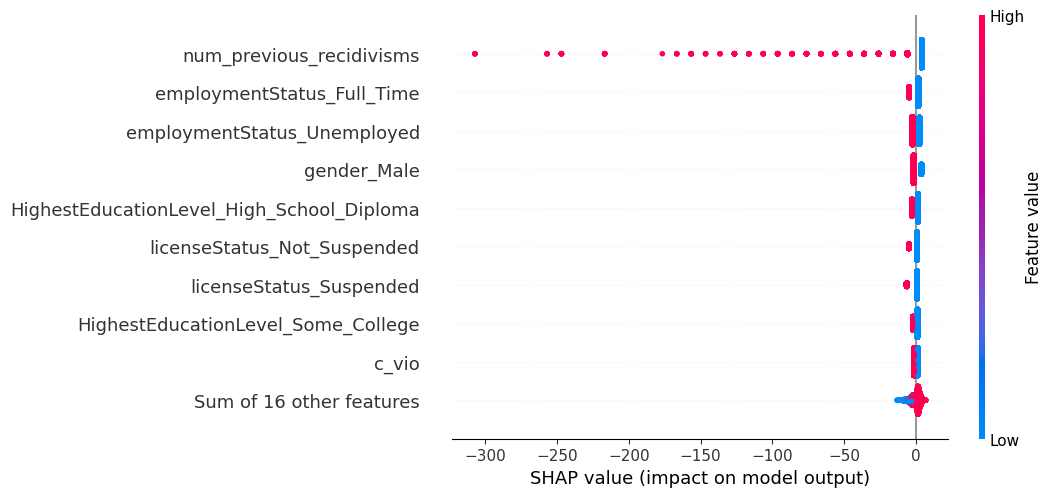

In [12]:
import shap

shap.plots.beeswarm(shap_rf[:,:,1])

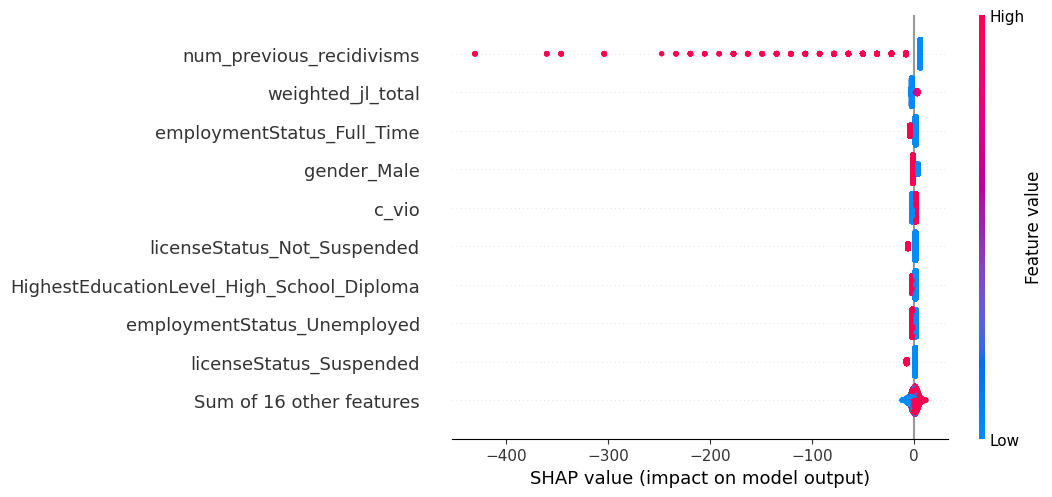

In [13]:
shap.plots.beeswarm(shap_rf[:,:,2])

In [4]:
from sklearn.model_selection import train_test_split
def split_data(my_csv: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    y = my_csv["placement"]
    X = my_csv.drop(["placement"], axis = 1)

    X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 50) 

    return X_train, X_test, y_train, y_test

In [14]:
!pip3 install matplotlib

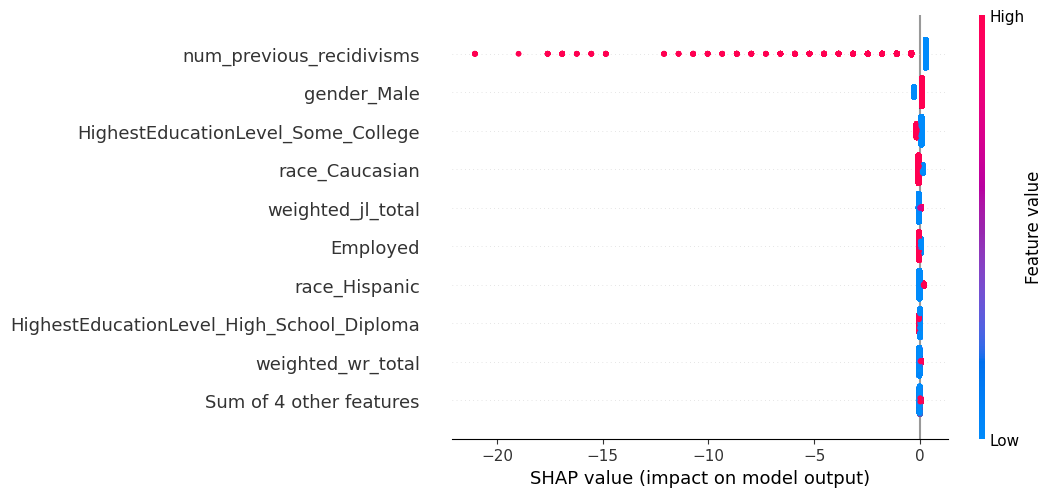

In [13]:
import shap

file_path = '../outputs/datasets/preprocessed_ds.csv'
preprocessed_ds = pd.read_csv(file_path)
X_train, X_test, y_train, y_test = split_data(preprocessed_ds)

shap.plots.beeswarm(shap_rf[:,:,1])